# Coherence analysis of B4 data

This is preliminary analysis of B4 data. On initial inspection I noticed that:

1. Hourly $L_{10}$ data from apartment interior exceeds 45dBA during mid-morning hours on both days, exceeding 50dBA
2. On listening to a few spots of exterior recordings, there is significant wind turbulence (intermittent) and hammering or impact drilling going on for significant periods.

It is immediately apparent that some additional processing of data is needed to isolate *normal* exterior noise (if possible), and to find periods where exterior measurements are sufficiently *correlated* to interior noise if we are going to use as basis for a field *noise reduction* estimate.

To semi-automate the analysis (and to avoid too much manual and painstaking combing through the recordings) I thought determining objective coherence of the exterior and interior signals would be useful (and interesting).

## Survey of Octave/Matlab coherence capabilities

* Devin thinks Dbrowse doesn't do it
  * [ ] Though check this with Joseph
* Convenient function `mscohere` in Octave/Matlab
* I wondered if there was someting like specgram/spectrogram but to visual coherence between two signals. Nothing oob that I found, but did come across something in a open source gravitational wave analysis package...
* I went ahead and did a minor modification of `specgram.m` in octave: 'mscoheregram'.
* Can we write tags to a .wav file in such a way that we could open a processed file in Audacity and quickly go to markers? That would be awesome: e.g. use Octave to build an array of event locations in the file, then use Audacity to check (listen, or quickly apply Kaidacity analysis)
  * **Yes** through *Audacity* labels. [Simply text format for label track could easily be built up in Octave](https://manual.audacityteam.org/man/importing_and_exporting_labels.html#:~:text=You%20can%20export%20labels%20using,name%20of%20the%20label%20track.). Let's try that.

## init

In [1]:
pkg load signal

## Initial *Sandbox*

### file io yuck

In [88]:
% just read one 10minute file
[y,fs] = audioread('BK/Soundrec 148.wav');

In [ ]:
% add some noise to a copy
yn = y + sqrt(mean(y.^2))*(rand(length(y),1)-0.5);

In [ ]:
tic
mscohere(y,yn)
toc
set(gcf,'Visible','on')

In [ ]:
tic
mscoheregram(y,yn,10*48000,48000); 
toc
colorbar
set(gcf,'Visible','on')

Hey that is cool and didn't take riculously long (computer time). Interesting that the high coherence region corresponds to where the hammering is (where the added noise doesn't mask it). Actually brings that event out even more clearly than spectrogram below. Is this a known technique ??

In [ ]:
tic
specgram(y,10*48000,48000); 
toc
colorbar
set(gcf,'Visible','on')

- [ ] would be nice to plot log frequency scale, but may not be straightforward with imagsc plot

### read in several audio files, and concatenate

In [143]:
for i=1:100
  start = i
  fname=["BK/Soundrec " num2str(start) ".wav" ]

  endfor

start = 1
fname = BK/Soundrec 1.wav
start = 2
fname = BK/Soundrec 2.wav
start = 3
fname = BK/Soundrec 3.wav
start = 4
fname = BK/Soundrec 4.wav
start = 5
fname = BK/Soundrec 5.wav
start = 6
fname = BK/Soundrec 6.wav
start = 7
fname = BK/Soundrec 7.wav
start = 8
fname = BK/Soundrec 8.wav
start = 9
fname = BK/Soundrec 9.wav
start = 10
fname = BK/Soundrec 10.wav
start = 11
fname = BK/Soundrec 11.wav
start = 12
fname = BK/Soundrec 12.wav
start = 13
fname = BK/Soundrec 13.wav
start = 14
fname = BK/Soundrec 14.wav
start = 15
fname = BK/Soundrec 15.wav
start = 16
fname = BK/Soundrec 16.wav
start = 17
fname = BK/Soundrec 17.wav
start = 18
fname = BK/Soundrec 18.wav
start = 19
fname = BK/Soundrec 19.wav
start = 20
fname = BK/Soundrec 20.wav
start = 21
fname = BK/Soundrec 21.wav
start = 22
fname = BK/Soundrec 22.wav
start = 23
fname = BK/Soundrec 23.wav
start = 24
fname = BK/Soundrec 24.wav
start = 25
fname = BK/Soundrec 25.wav
start = 26
fname = BK/Soundrec 26.wav
start = 27
fname = BK/Soundrec

In [132]:
% just read one 10minute file
%[y,fs] = audioread('BK/Soundrec 148.wav');

for i=1:17
  start = i+140
  fname=["BK/Soundrec " num2str(start) ".wav" ];
  yarray(:,i) = audioread(fname);
  y = reshape(yarray,[],1);
  endfor


start = 141
start = 142
start = 143
start = 144
start = 145
start = 146
start = 147
start = 148
start = 149
start = 150
start = 151
start = 152
start = 153
start = 154
start = 155
start = 156
start = 157


In [ ]:
tic
specgram(y,10*48000,48000); 
toc
colorbar
set(gcf,'Visible','on')

### read Rion file

In [22]:
# read in the RION file that probably has same events (outside measurement)
yr = audioread('Rion/NL_001_20220111_111437_100dB_0005_0000_ST0025.wav');

Elapsed time is 12.878 seconds.


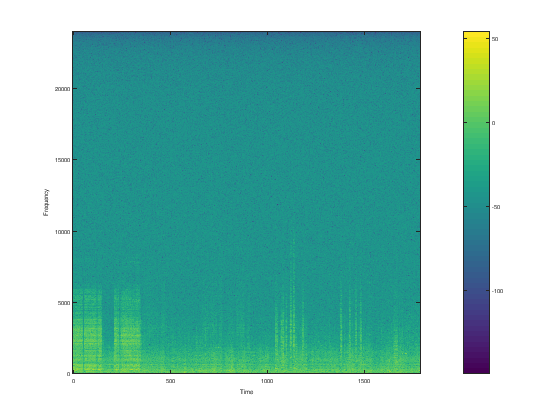

In [38]:
tic
specgram(yr(1:30*60*48000),10*48000,48000); # first 30 minutes of RION file
toc
colorbar
set(gcf,'Visible','on')

In [ ]:
# lets try xcorr these?
# first test speed with something smaller
%t = 60*30 ; % time in seconds
tic
it = xcorr(yr(1:48000*500),y(1000*48000:end));
toc
plot(decimate(it,48000))
set(gcf,'Visible','on')
[~,im] =max(it)
ceil(length(it)/2)-im

In [ ]:
ans/48000

In [ ]:
ans/60

In [ ]:
tic
specgram(it,10*48000,48000)
toc
colorbar
set(gcf,'Visible','on')

In [ ]:
plot(decimate(it,4800))
set(gcf,'Visible','on')

Let's just find a better marker. O.K. found a truck horn:
* @52minutes in Rion file 25
* @ 8m40s in BK file 152

duration ~4s

In [ ]:
[ybhorn,fs] = audioread('BK/Soundrec 152.wav');
yrhorn = yr(50*60*48000+1:end);

In [ ]:
# lets try xcorr these?
# first test speed with something smaller
%t = 60*30 ; % time in seconds
tic
it = xcorr(yrhorn,ybhorn);
toc
plot(decimate(it,48000))
set(gcf,'Visible','on')
[~,im] =max(it)
ceil(length(it)/2)-im

In [ ]:
ans/48000

In [ ]:
8.6666666-2

In [ ]:
# take one minute, including the horn, approximately aligned
ho = ybhorn(8.5*60*48000:8.5*60*48000+48000*60);
hi = yr((44+46/60)*60*48000:(44+46/60)*60*48000+48000*60);

In [ ]:
tic
specgram(hi,48000,48000)
toc
colorbar
set(gcf,'Visible','on')

In [ ]:
tic
specgram(ho,48000,48000)
toc
colorbar
set(gcf,'Visible','on')

In [ ]:
tic
oo = 28094
mscoheregram(ho(oo:end),hi(1:end-oo),.5*48000,48000); 
toc
colorbar
set(gcf,'Visible','on')

In [ ]:
# now that we have that sorted out, try the xcorr thing again:
# lets try xcorr these?
# first test speed with something smaller
%t = 60*30 ; % time in seconds
tic
it = xcorr(hi,ho);
toc
plot(decimate(it,24))
set(gcf,'Visible','on')
[~,im] =max(it)
ceil(length(it)/2)-im

### time align the out and in, and mscoheregram it

In [21]:
# now let's try coheregram on something longer
# let's try to get an hour of B&K data aligned with the rion:

for i=1:7
  start = i+147
  fname=["BK/Soundrec " num2str(start) ".wav" ];
  yarray(:,i) = audioread(fname);
 
  endfor
y = reshape(yarray,[],1);
ystart = (8+40/60)*60*48000-28094-(4+56/60)*60*48000;
y = y(ystart+1:ystart+3600*48000);

start = 148
start = 149
start = 150
start = 151
start = 152
start = 153
start = 154


In [25]:
size(y)
size(yr)

ans =

   1.7280e+08   1.0000e+00

ans =

   1.7280e+08   1.0000e+00



Elapsed time is 3.87881 seconds.


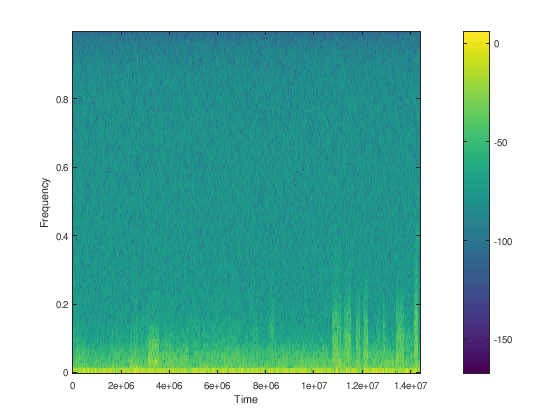

In [30]:
tic
st = (25+26/60)*60*48000;
specgram(yr(st:st+10*60*48000))
toc
colorbar
set(gcf,'Visible','on')

Elapsed time is 3.91086 seconds.


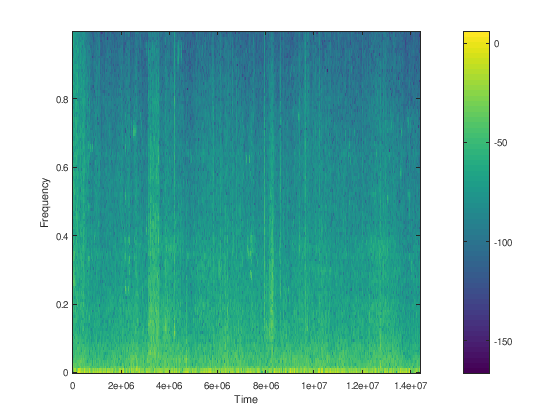

In [31]:
tic
st = (25+26/60)*60*48000;
specgram(y(st:st+10*60*48000))
toc
colorbar
set(gcf,'Visible','on')

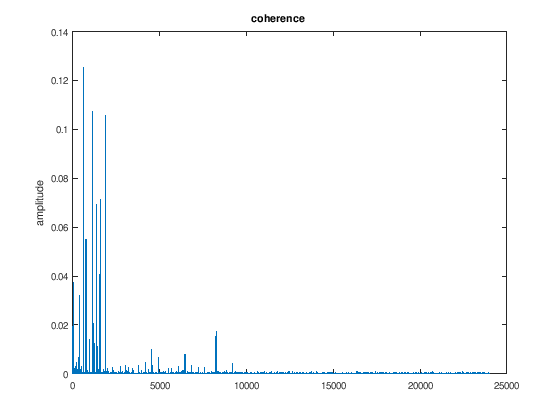

In [28]:
mscohere(y,yr,[],[],[],48000)
set(gcf,'Visible','on')

In [79]:
length(hann(48000))

ans = 48000


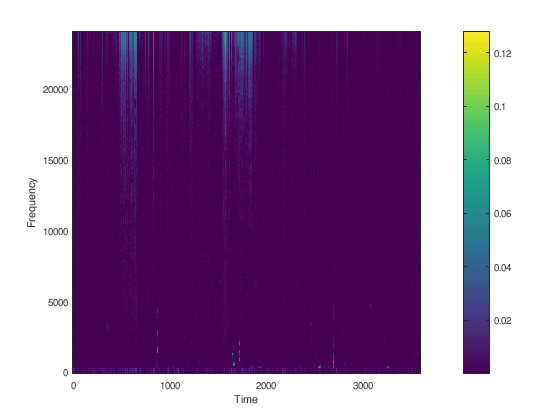

In [29]:
mscoheregram(y,yr,10*48000,48000)
colorbar
set(gcf,'Visible','on')

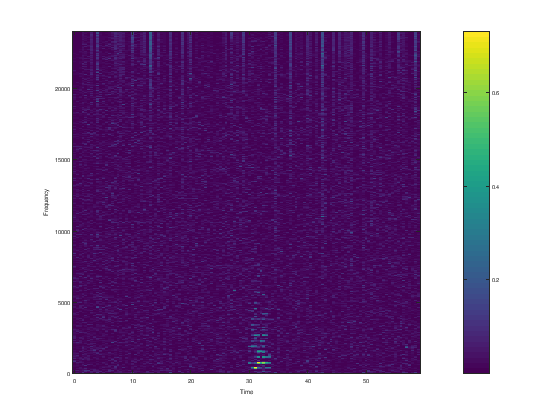

In [94]:
mscoheregram(y(st:st+1*60*48000),yr(st+0*48000:st+1*60*48000+0*48000),48000,48000)
colorbar
set(gcf,'Visible','on')

In [99]:
2000/60

ans = 33.333


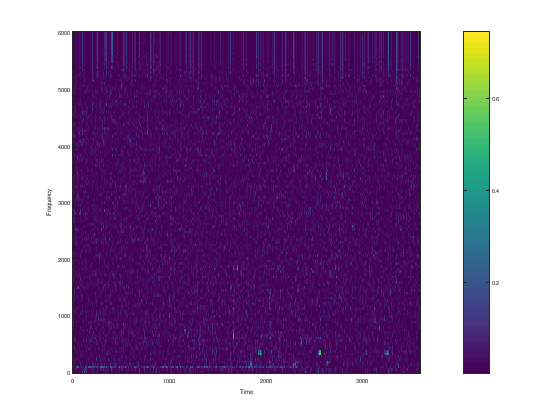

In [97]:
mscoheregram(decimate(y,4),decimate(yr,4),12000,12000)
colorbar
set(gcf,'Visible','on')

Elapsed time is 12.8648 seconds.
im = 2.8782e+07
ans = 17827


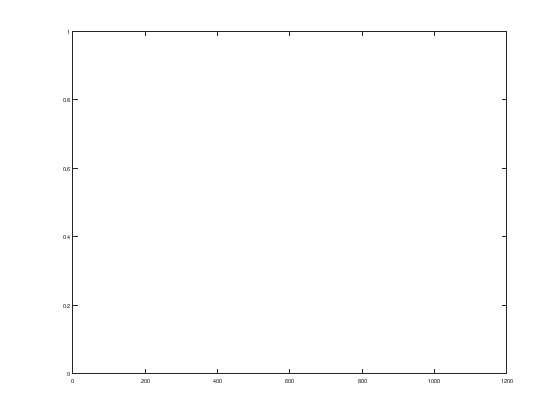

In [42]:
# lets try xcorr these?
# first test speed with something smaller
%t = 60*30 ; % time in seconds
tic
it = xcorr(yr(1:10*60*48000),y(1:10*60*48000));
toc
plot(decimate(it,48000))
set(gcf,'Visible','on')
[~,im] =max(it)
ceil(length(it)/2)-im

Elapsed time is 12.0025 seconds.


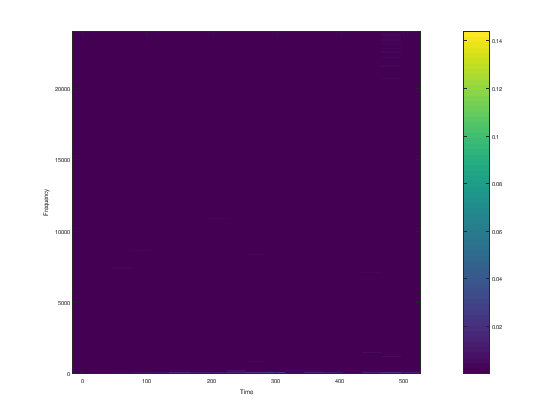

In [52]:
tic
mscoheregram(y(1:10*60*48000),yr(1:10*60*48000),60*48000,48000); 
toc
colorbar
set(gcf,'Visible','on')

Elapsed time is 1.64558 seconds.


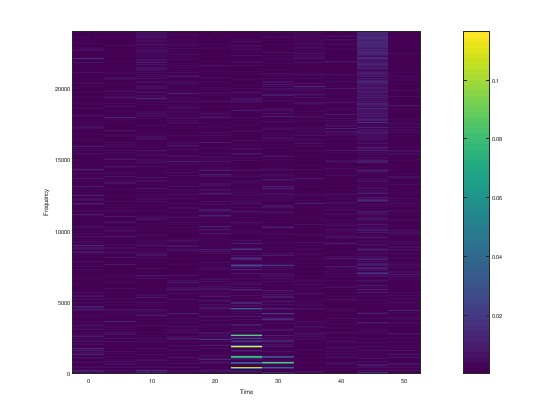

In [50]:
tic
mscoheregram(y(st:st+1*60*48000),yr(st:st+1*60*48000),10*48000,48000); 
toc
colorbar
set(gcf,'Visible','on')

Elapsed time is 68.8058 seconds.


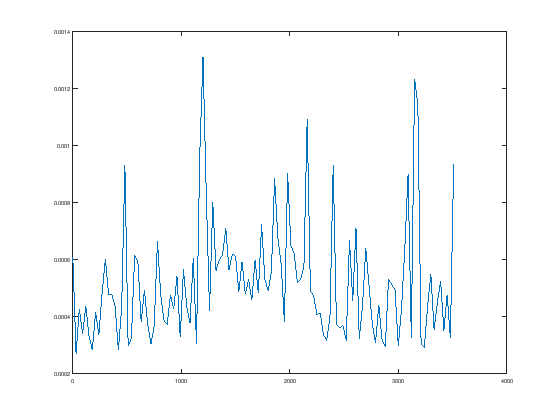

In [27]:
tic
[S,f,t] = mscoheregram(y,circshift(yr,5*60*48000),60*48000,48000); 
toc
plot(t,mean(S))
set(gcf,'Visible','on')

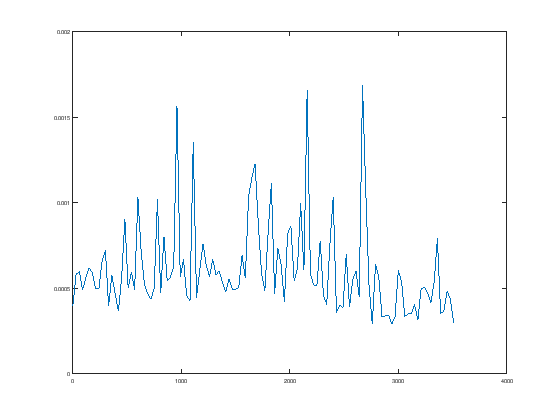

In [25]:
plot(t,mean(S))
set(gcf,'Visible','on')

In [ ]:
thetime=(44+100/60)*60*48000
mscohere(y(thetime:thetime+5*48000),yr(thetime:thetime+5*48000))
set(gcf,'Visible','on')

## Loud event detection

Here's the algorithm idea:

1. read in an hour's worth of audio (let's say interior)
2. A-weight
3. time-weight
4. decimate (10ms I guess)
5. add time vector (in seconds)
6. sort by Lp column
7. Take top 10% of that (i.e. L10 or above). Also determine what percentile accounts for 45dBA limit
8. hard part: find practical contiguous regions that are 'loud events'. Maybe we sample at 1s intervals only?
9. parse into text file for audacity label track. 
10. Open wav in Audacity, import label track and audition every region. Delete if appropriate (i.e. if positively identified as construction noise. If it is a truck horn or siren, then too bad). 
11. save edited file. 
12. in Octave, process edited file and determine new a-weighted stats. compare to old. 

* Note I am avoiding any calibration in the algorithm above. 

In [1]:
# test build a string and write to .txt file ?
A =["Todd" "\t" "Lawrence" "\t" "Brooks" "\n" "Todd1" "\t" "L1awrence" "\t" "2Brooks"]

A = Todd	Lawrence	Brooks
Todd1	L1awrence	2Brooks


In [ ]:
save -ascii todd.txt A

In [2]:
filename = "todd.txt";
fid = fopen (filename, "w");
fputs (fid, A);
fclose (fid);

In [ ]:
A

In [11]:
dater = rand(100,1);
datert = [1:100]'; # "seconds";
sar = [datert,dater];
ssar = sortrows(sar,2);
mylabels="";
for i=1:10
  tmark = num2str(ssar(i,1));
  mylabels = [mylabels tmark "\t" tmark "\t" num2str(i) "label" "\n"];
endfor

filename = "L10_labels.txt";
fid = fopen (filename, "w");
fputs (fid, mylabels);
fclose (fid);
# though this is a bit primitive... need to identify ranges


In [10]:
mylabels

mylabels = 85	85	1label
13	13	2label
67	67	3label
89	89	4label
72	72	5label
91	91	6label
5	5	7label
21	21	8label
49	49	9label
57	57	10label




or sometihng simpler, like breaking up L10s into shorter periods (15min? 10min?) Should be able to get a visual sense of fraction of time noisy events are happening.
Are they spreadh throughout, or isolated in certain portions of the hour? Maybe:

1. calc L10 1hr , and then start bisecting (all based on the same array of values, can `reshape` multiple times.

In [43]:
dater = rand(100000,1);
datert = [1:100000]'; # "seconds";
sar = [datert,dater];
ssar = sortrows(sar,2);
bisect1 = reshape(dater,[],100);

In [26]:
sar(1:5,:)

ans =

   1.0000   0.4432
   2.0000   0.3589
   3.0000   0.4048
   4.0000   0.7501
   5.0000   0.9832



In [44]:
std(sort(bisect1)(900,:)')

ans = 9.8999e-03


In [35]:
dater(76)

ans = 0.1420


In [36]:
sort(bisect1)

ans =

   0.042743   0.013728   0.010839   0.059175
   0.068935   0.016668   0.041176   0.071467
   0.187779   0.052711   0.078484   0.101570
   0.191689   0.120660   0.084862   0.141961
   0.203954   0.124490   0.093046   0.184073
   0.208985   0.141414   0.274442   0.188558
   0.233457   0.150018   0.275092   0.204560
   0.285033   0.281996   0.314751   0.215928
   0.304448   0.305716   0.333903   0.273278
   0.356894   0.385935   0.388297   0.393474
   0.457836   0.402165   0.448173   0.443714
   0.472691   0.408932   0.461980   0.444030
   0.492218   0.490063   0.487449   0.450343
   0.513857   0.500638   0.514698   0.503588
   0.539846   0.531630   0.556763   0.520115
   0.561556   0.705468   0.613408   0.526891
   0.586328   0.731509   0.619806   0.533281
   0.626774   0.787101   0.649291   0.558162
   0.704542   0.787504   0.661503   0.651139
   0.819037   0.877171   0.718527   0.764724
   0.824410   0.911353   0.734561   0.814333
   0.834074   0.926204   0.774688   0.835107
   

In [51]:
size(yra)

ans =

   1.7280e+08   1.0000e+00



In [15]:
[b,a] = adsgn(48000);
zi = filter_zi(b,a,yr1(1)); # initial states to reducing ringing...haven't looked to see if significant.
yra1 = filter(b,a,yr1,zi);

In [16]:
yre1 = time_weight_exp(yra1.^2,1.0,48000);

In [19]:
# first approximationn of calibration factor for Rion, based on LAeq reported by meter
calr = 112.95

calr = 112.95


In [20]:
# leq, lmax, lmin...L5, 10, 50, 90, 95
10*log10(mean(yre1))+calr  # leq
s = length(yre1);
sortdb = flipud(sort(10*log10(yre1)+calr));
sortdb([1 end s*[ .05 .1 .5 .9 .95 .01 .001]]) # lmin, lmax, l5, l10, l50, l90, l95 !! L1, l0.01

ans = 37.666
ans =

   58.317
   31.387
   39.677
   39.064
   35.487
   33.054
   32.689
   46.062
   54.079



### bisecting calibrated stats

In [142]:
# now that we are calibrated, llet's try the bisected stats...
## dater = rand(100000,1);
##datert = [1:100000]'; # "seconds";
## sar = [datert,dater];
ssar = sortrows(sar,2);
nper = 24 ; # number of splits of the hour
bisect1 = reshape(10*log10(yre)+calr,[],nper);
sortdb = flipud(sort(bisect1));
s=size(sortdb)(1);
60/nper # minute periods
sortdb([end 1 s*[ .05 .1 .5 .9 .95 .01 .001 0.2]],:) # lmin, lmax, l5, l10, l50, l90, l95 !! L1, l0.01

error: 'sar' undefined near line 1, column 1
error: 'yre' undefined near line 1, column 1
error: 'bisect1' undefined near line 1, column 1
ans = 2.5000
ans =

 Columns 1 through 8:

   31.801   33.334   31.492   32.630   33.021   31.940   32.027   31.887
   72.615   58.146   64.861   60.436   54.350   65.490   59.785   62.330
   52.299   48.654   43.819   45.111   42.989   44.179   44.243   42.690
   48.711   44.177   41.706   42.648   41.974   41.167   41.580   40.351
   39.237   38.797   37.678   38.349   39.223   36.913   36.846   36.544
   35.038   35.280   34.148   34.855   35.871   33.839   33.979   33.743
   34.231   34.714   33.567   34.257   34.899   33.472   33.496   33.394
   59.372   51.987   48.224   53.600   46.394   51.821   50.726   49.301
   65.954   57.427   61.722   59.809   51.609   62.576   57.390   60.133
   42.722   41.368   40.068   40.841   41.085   39.566   39.432   38.965

 Columns 9 through 16:

   31.220   31.339   31.133   30.872   30.692   30.671   29.806

In [ ]:
# try to plot Lp at 1s samplings

plot(10*log10(yre/mean(yre)))
set(gcf,'Visible','on')

In [120]:

format short
output_precision(3)
sortdb(1)

ans = 64.3


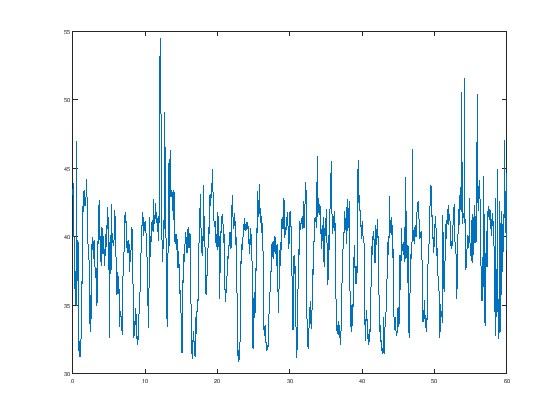

In [184]:
#plot dBA relative to Leq
plot([1:length(yre)/100]/60,10*log10(yre)(1:100:end)+calr)
set(gcf,'Visible','on')

In [90]:
10*log10(mean(yra.^2))-46.5

ans = -112.91


In [85]:
yret = [1:length(yre)]/2; # "seconds";
sar = [yret',yre];
ssar = sortrows(sar,-2);
mylabels="";
for i=1:720
  tmark = num2str(ssar(i,1));
  mylabels = [mylabels tmark "\t" tmark "\t" num2str(i) "label" "\n"];
endfor

filename = "L10_labels.txt";
fid = fopen (filename, "w");
fputs (fid, mylabels);
fclose (fid);
# though this is a bit primitive... need to identify ranges

In [82]:
size(yre)/10

ans =

   720.0000     0.1000



### multiple audio file stuff

In [19]:
calr

calr = 112.90


In [1]:
calr = 112.9 # check this

calr = 106.30


In [ ]:
# all the BandK data
pkg load signal
tic
files = glob('BK/*wav');
yret=[];
[b,a] = adsgn(48000);
for i=1:(numel(files)-1) 
  [~, name, ext] = fileparts (files{i})
  ybk = audioread(["BK/" name ext]);
  zi = filter_zi(b,a,ybk(1)); # initial states to reducing ringing...haven't looked to see if significant.
  yra = filter(b,a,yr,zi);
  yret(:,i) = 10*log10(time_weight_exp(yra.^2,1.0,48000));
endfor
toc

In [20]:
tic
files = glob('Rion/NL*wav');
yret=[];
[b,a] = adsgn(48000);
for i=1:(numel(files)-1) 
  [~, name, ext] = fileparts (files{i});
  yr = audioread(["Rion/" name ext]);
  zi = filter_zi(b,a,yr(1)); # initial states to reducing ringing...haven't looked to see if significant.
  yra = filter(b,a,yr,zi);
  yret(:,i) = 10*log10(time_weight_exp(yra.^2,1.0,48000))+calr;
endfor
toc

Elapsed time is 229.465 seconds.


In [ ]:
# so this takes literally a couple of minutes to process 24-hours and outputs Lp in dBA for every 10ms
# with every hour in one column. Now we can reshape to our hearts content
# first example, take the global stats for all whole hours:
sortdb = flipud(sort(reshape(yret,[],1)));
s=size(sortdb)(1);
sortdb([end 1 s*[ .05 .1 .5 .9 .95 .01 .001 0.2]],:) # lmin, lmax, l5, l10, l50, l90, l95 !! L1, l0.01, L20

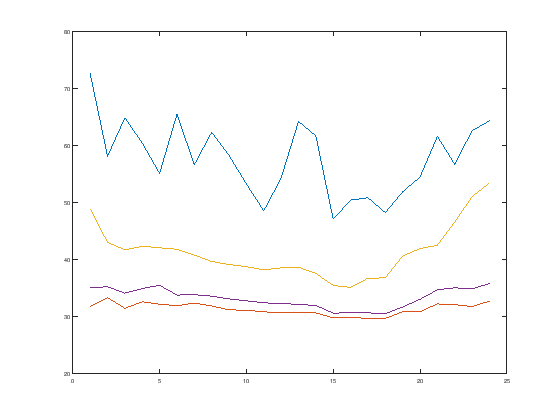

In [22]:
# or plot Lmax, Lmin, L10 and L90 in 60-minute intervals
sortdb = flipud(sort(reshape(yret,[],24)));
s=size(sortdb)(1);
plot(sortdb([1 end floor(s*[ .1 .9 ])],:)' )
set(gcf,'Visible','on')

In [23]:
sortdb = flipud(sort(yret));
s=size(sortdb)(1);
sortdb([end 1 s*[ .05 .1 .5 .9 .95 .01 .001 0.2]],:) # lmin, lmax, l5, l10, l50, l90, l95 !! L1, l0.01

ans =

 Columns 1 through 8:

   31.801   33.334   31.492   32.630   33.021   31.940   32.027   31.887
   72.615   58.146   64.861   60.436   54.350   65.490   59.785   62.330
   52.299   48.654   43.819   45.111   42.989   44.179   44.243   42.690
   48.711   44.177   41.706   42.648   41.974   41.167   41.580   40.351
   39.237   38.797   37.678   38.349   39.223   36.913   36.846   36.544
   35.038   35.280   34.148   34.855   35.871   33.839   33.979   33.743
   34.231   34.714   33.567   34.257   34.899   33.472   33.496   33.394
   59.372   51.987   48.224   53.600   46.394   51.821   50.726   49.301
   65.954   57.427   61.722   59.809   51.609   62.576   57.390   60.133
   42.722   41.368   40.068   40.841   41.085   39.566   39.432   38.965

 Columns 9 through 16:

   31.220   31.339   31.133   30.872   30.692   30.671   29.806   29.851
   55.006   58.269   48.576   54.299   48.747   64.238   46.435   50.450
   40.119   39.629   39.342   39.557   39.679   39.504   37.603   36.

# drilling noise reduction

## 24

I edited the worst single hour logged by Rion (file 024), manually deleting positively identifiable sustained drilling noise (only).

In [11]:
yr_ed = audioread('Rion/ed001_NL_001_20220111_101437_100dB_0005_0000_ST0024.wav');

ans =

   32.879   33.815   32.623   31.801
   50.758   47.706   57.171   56.941
   45.919   42.589   45.862   43.289
   43.345   42.182   44.045   42.427
   39.658   39.643   39.538   38.570
   34.127   35.524   35.474   34.059
   33.650   35.071   34.374   33.675
   48.049   43.832   52.128   49.566
   49.594   46.303   56.585   55.574
   41.575   41.265   42.326   41.007



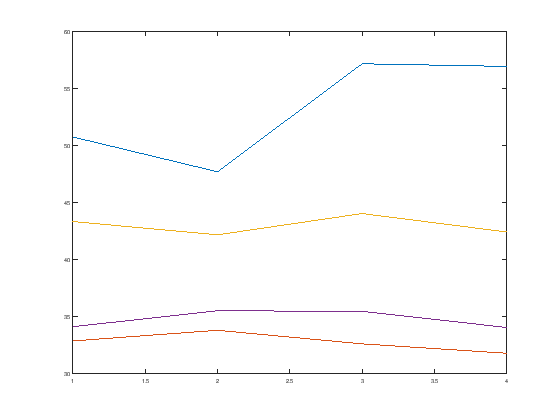

In [26]:
  yret_ed=[];
[b,a] = adsgn(48000);
zi = filter_zi(b,a,yr_ed(1)); # initial states to reducing ringing...haven't looked to see if significant.
  yra_ed = filter(b,a,yr_ed,zi);
  yret_ed = 10*log10(time_weight_exp(yra_ed.^2,1.0,48000))+calr;

  sortdb_ed = flipud(sort(reshape(yret_ed,[],4)));
  s=size(sortdb_ed)(1);
    sortdb_ed([end 1 floor(s*[ .05 .1 .5 .9 .95 .01 .001 0.2])],:) # lmin, lmax, l5, l10, l50, l90, l95 !! L1, l0.01, L20

plot(sortdb_ed([1 end floor(s*[ .1 .9 ])],:)' )
set(gcf,'Visible','on')

In [14]:
# a more careful trimming of drilling noise:

ans =

   1.7280e+08   1.0000e+00



In [27]:
yr_ed = audioread('Rion/ed002_NL_001_20220111_101437_100dB_0005_0000_ST0024.wav');

ans =

   31.801
   56.934
   43.572
   42.475
   39.264
   34.563
   33.948
   47.375
   55.017
   41.379



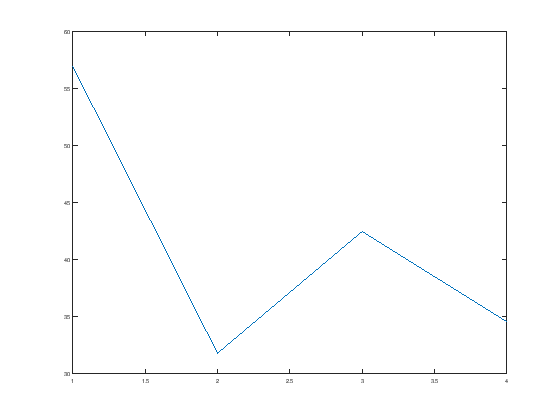

In [29]:
  yret_ed=[];
[b,a] = adsgn(48000);
zi = filter_zi(b,a,yr_ed(1)); # initial states to reducing ringing...haven't looked to see if significant.
  yra_ed = filter(b,a,yr_ed,zi);
  yret_ed = 10*log10(time_weight_exp(yra_ed.^2,1.0,48000))+calr;

  sortdb_ed = flipud(sort(reshape(yret_ed,[],1)));
  s=size(sortdb_ed)(1);
    sortdb_ed([end 1 floor(s*[ .05 .1 .5 .9 .95 .01 .001 0.2])],:) # lmin, lmax, l5, l10, l50, l90, l95 !! L1, l0.01, L20

plot(sortdb_ed([1 end floor(s*[ .1 .9 ])],:)' )
set(gcf,'Visible','on')

## 23

In [30]:
yr_ed = audioread('Rion/ed003_NL_001_20220111_091437_100dB_0005_0000_ST0023.wav');

ans =

   32.129
   54.469
   44.925
   43.179
   39.473
   34.763
   34.132
   48.856
   52.634
   41.746



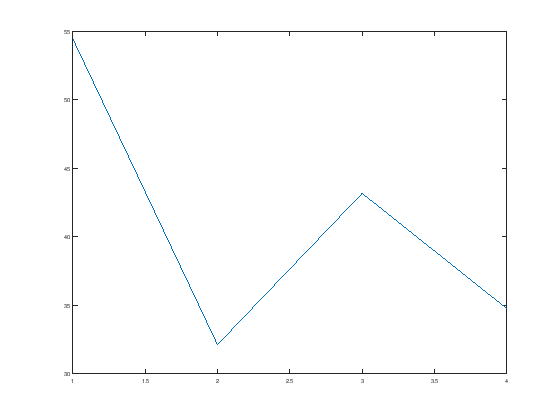

In [31]:
yret_ed=[];
[b,a] = adsgn(48000);
zi = filter_zi(b,a,yr_ed(1)); # initial states to reducing ringing...haven't looked to see if significant.
  yra_ed = filter(b,a,yr_ed,zi);
  yret_ed = 10*log10(time_weight_exp(yra_ed.^2,1.0,48000))+calr;

  sortdb_ed = flipud(sort(reshape(yret_ed,[],1)));
  s=size(sortdb_ed)(1);
    sortdb_ed([end 1 floor(s*[ .05 .1 .5 .9 .95 .01 .001 0.2])],:) # lmin, lmax, l5, l10, l50, l90, l95 !! L1, l0.01, L20

plot(sortdb_ed([1 end floor(s*[ .1 .9 ])],:)' )
set(gcf,'Visible','on')

## 25

In [34]:
yr_ed = audioread('Rion/ed_004_NL_001_20220111_111437_100dB_0005_0000_ST0025.wav');

ans =

   32.737
   64.340
   44.179
   42.685
   39.023
   35.589
   34.936
   48.841
   59.090
   41.316



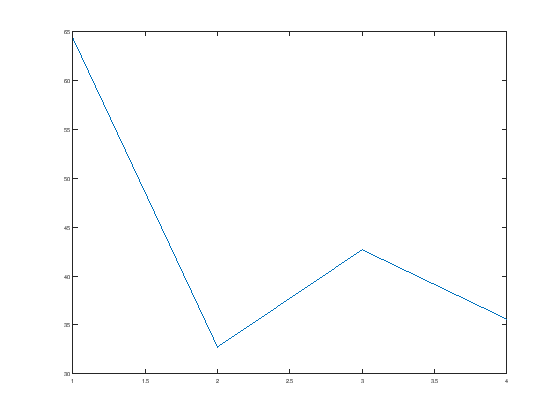

In [35]:
yret_ed=[];
[b,a] = adsgn(48000);
zi = filter_zi(b,a,yr_ed(1)); # initial states to reducing ringing...haven't looked to see if significant.
  yra_ed = filter(b,a,yr_ed,zi);
  yret_ed = 10*log10(time_weight_exp(yra_ed.^2,1.0,48000))+calr;

  sortdb_ed = flipud(sort(reshape(yret_ed,[],1)));
  s=size(sortdb_ed)(1);
    sortdb_ed([end 1 floor(s*[ .05 .1 .5 .9 .95 .01 .001 0.2])],:) # lmin, lmax, l5, l10, l50, l90, l95 !! L1, l0.01, L20

plot(sortdb_ed([1 end floor(s*[ .1 .9 ])],:)' )
set(gcf,'Visible','on')

## summary

* The more careful drilling noise reduction trimming only reduced L_10 by 0.3 dB. Keep to the "course" and more conservative reduction
* From review of calibrated audio recordings, significant construction noise was audible during hours of the day with highest logged hourly noise levels.
* We were able to positively identify intermittent sustained drilling activity and removed these intervals, and then recalculated noise statistics. We did not remove numerous impact noises, responsible for peak impulsive events during the period, or any other data not identifiable as drilling.
* We only reviewed and corrected data from the three hours between 8 and 11AM Tuesday having the highest uncorrected interior LA10. 
* The apartment was unfurnished, and highly revereberant. Reverberation time in the bedroom was over 1s from xx to xxHz. The interior noise would be less for a normally furnished apartment (condition assumed in EIS calculations and design predictions). To account for this, we subtract 3dBA from sound levels measured in the empty bedroom.
* The resulting corrected levels L10A,1Hr are significantly below 45dBA during all hour periods.
* Fair weather, though there were wind gusts during some measurement periods (evidenced by audible wind turbulence in exterior microphone recordings).
* Corrected LA10 summary (not including periods of sustained drilling, no correction for revereberation):
| hour beginning | uncorrected L10A | corrected L10A |
|----|----|----|
|08:14 | 46.9   | 43.2|
|09:14 | 53.1 | 42.8 |
|10:14 | 47.2 | 42.7 |


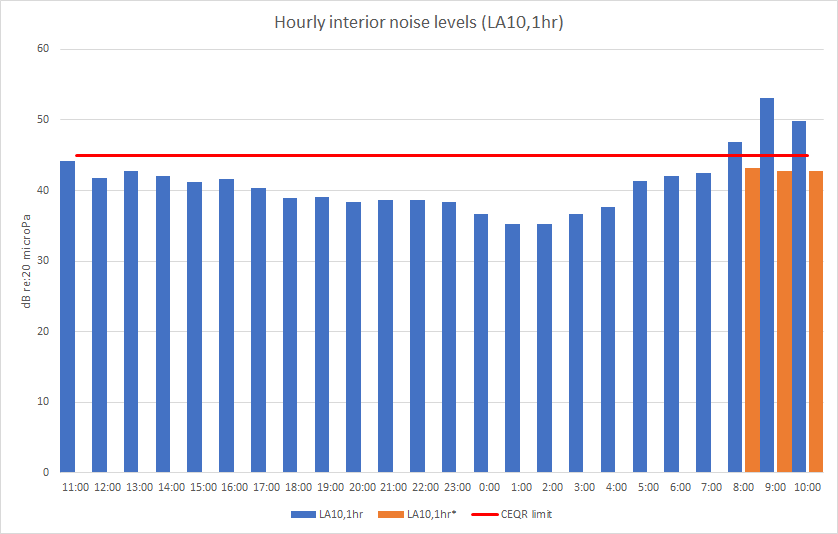


Caption: LA10,1hr from interior noise measured in apartment 8xx, from Monday January 10 to Tuesday January 11. Noise levels were below 45dBA L10 for all hours, not counting intervals where construction drilling dominated the interior noise. No correction for empty reverberant condition of apartment (typical furnishings would result in lower interior levels)

# TL attempt

In [87]:
# y is raw B&K data for hour containing the "honk"
# filter and weight
clear y
clear ya
clear yat

In [95]:
size(yat)*480

ans =

   2.8800e+07   4.8000e+02



In [107]:
[y,fs] = audioread('BK/Soundrec 148.wav');

In [109]:
min(y)

 % just read one 10minute file
[y,fs] = audioread('BK/Soundrec 152.wav');
 [b,a] = adsgn(48000);
  calbk = 1.9679e+07 ;
  zi = filter_zi(b,a,calbk*y(1)); # initial states to reducing ringing...haven't looked to see if significant.calbk = -20*log10(2e-5)
  ya = filter(b,a,calbk*y,zi);
  yat = 10*log10(time_weight_exp(ya.^2,1.0,48000));

ans = -0.021902


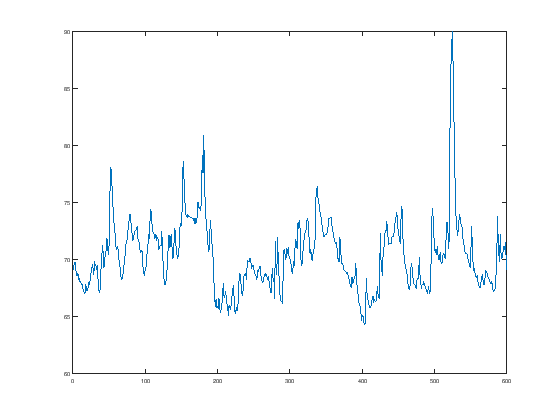

In [140]:
plot(yat(1:100:end))
set(gcf,'Visible','on')

In [141]:
max(yat)

ans = 90.445


In [130]:
# calibration thing
% just read one 10minute file
[~,~,~,bkdk,~] = BKwavread('BK/Soundrec 47.wav','size');
%[~,~,~,bkdk,~] = BKwavread('AAcNY3_001_1.wav','size');

In [98]:
size(bkdk)

ans =

    1   96



In [99]:
bkdk

bkdk = 02.10 220111 10:10:26 4189 0.04661171 V/Pa   1.0   1.0   393.5775 0.0 145.88 SQ0 2250-2626254   


In [74]:
regexp(bkdk,'1\.0...1\.0...(.*?).SQ0','tokens'){1}

ans =
{
  [1,1] = 13.53724 0.0 116.61
}



In [75]:
strsplit(regexprep(regexp(bkdk,'1\.0...1\.0...(.*?).SQ0','tokens'){1},'\x{00}','x'),'x')

error: strsplit: S and DEL must be string values
error: called from
    strsplit at line 188 column 5


In [111]:
num = strsplit(regexprep(regexp(bkdk,'1\.0...1\.0...(.*?).SQ0','tokens'){1},'\x{00}','x'){1},'x'){1}

num = 393.5775


In [131]:
num = strsplit(regexprep(regexp(bkdk,'1\.0...1\.0...(.*?).SQ0','tokens'){1},'\x{00}','x'){1},'x')

num =
{
  [1,1] = 393.5775
  [1,2] = 0.0
  [1,3] = 145.88
}



In [113]:
10^(145.88/20)

ans = 1.9679e+07


In [70]:
20*log10(393.58^2)

ans = 103.80


In [71]:
calr

calr = 112.90


In [32]:
%lsmagic

Available line magics:
%activity  %cd  %connect_info  %conversation  %dot  %download  %edit  %get  %help  %html  %include  %install  %install_magic  %javascript  %jigsaw  %kernel  %kx  %latex  %load  %ls  %lsmagic  %macro  %magic  %matplotlib  %parallel  %plot  %pmap  %px  %python  %reload_magics  %restart  %run  %scheme  %set  %shell

Available cell magics:
%%activity  %%brain  %%conversation  %%debug  %%dot  %%file  %%help  %%html  %%javascript  %%kx  %%latex  %%macro  %%pipe  %%processing  %%px  %%python  %%scheme  %%shell  %%show  %%time  %%tutor


Answer is {{calr}}

In [36]:
prettythis = [1 2 3 4 10*log10(6)]

prettythis =

   1.0000   2.0000   3.0000   4.0000   7.7815



The array is {{disp(prettythis)}}

In [49]:
atbl = "|my|name|\n|----|----|\n|is|Todd|"

atbl = |my|name|
|----|----|
|is|Todd|


Can I {{disp(atbl)}}

|my|name|
|----|----|
|is|Todd|

In [83]:
function str=mat2md(m)
str = "| |";
for i=1:size(m)(2)
str = [str num2str(i) "|" ];
endfor
str = [str "\n|----| "];
for i=1:size(m)(2)
str = [str "----" "|" ];
endfor
str = [str "\n"];
for i=1:size(m)(1)
  str = [str "|" num2str(i) "|"];
  for j=1:size(m)(2)
  str = [str num2str(m(i,j)) "|"];
  endfor
  str = [str "\n"];
endfor
endfunction

In [84]:
gum =rand(10,15)

gum =

 Columns 1 through 6:

   4.9995e-01   4.7746e-01   8.7084e-01   9.6648e-01   5.6792e-01   4.7351e-01
   2.9630e-01   2.8955e-02   9.3897e-03   8.2399e-01   2.7431e-01   6.7959e-01
   3.0804e-01   4.6350e-01   4.6552e-01   2.1629e-01   7.4434e-01   1.5216e-01
   1.7056e-01   2.3579e-01   1.1249e-01   2.5711e-01   5.3575e-01   6.7688e-02
   2.9839e-01   7.5195e-02   5.8059e-01   9.5924e-01   1.0867e-01   7.7425e-01
   4.1702e-01   8.0383e-01   5.1086e-01   8.9426e-01   5.1394e-01   8.9856e-01
   8.0896e-02   9.5134e-01   2.1440e-01   8.6781e-01   3.2984e-01   7.4128e-01
   7.9653e-02   5.8792e-01   5.6646e-01   9.6484e-01   9.6951e-01   6.4159e-01
   7.4314e-01   5.9434e-01   6.7391e-01   6.6382e-01   1.7265e-01   2.7755e-01
   6.9984e-02   4.9687e-01   7.4851e-01   4.0397e-01   2.9195e-01   9.7277e-01

 Columns 7 through 12:

   4.2760e-01   5.8906e-01   7.1603e-01   5.4169e-01   9.4791e-01   4.5358e-01
   4.2107e-01   8.7872e-01   9.6206e-01   5.9210e-01   8.2179e-01   6.9968e-

In [85]:
mat2md(gum)

ans = | |1|2|3|4|5|6|7|8|9|10|11|12|13|14|15|
|----| ----|----|----|----|----|----|----|----|----|----|----|----|----|----|----|
|1|0.49995|0.47746|0.87084|0.96648|0.56792|0.47351|0.4276|0.58906|0.71603|0.54169|0.94791|0.45358|0.70769|0.1714|0.89311|
|2|0.2963|0.028955|0.0093897|0.82399|0.27431|0.67959|0.42107|0.87872|0.96206|0.5921|0.82179|0.69968|0.162|0.258|0.46259|
|3|0.30804|0.4635|0.46552|0.21629|0.74434|0.15216|0.28902|0.57966|0.064322|0.12733|0.068917|0.92161|0.3604|0.10772|0.39108|
|4|0.17056|0.23579|0.11249|0.25711|0.53575|0.067688|0.76365|0.37867|0.43639|0.75098|0.88428|0.43145|0.55067|0.13431|0.622|
|5|0.29839|0.075195|0.58059|0.95924|0.10867|0.77425|0.61127|0.51155|0.62722|0.51173|0.64171|0.043616|0.22001|0.51617|0.69051|
|6|0.41702|0.80383|0.51086|0.89426|0.51394|0.89856|0.82594|0.866|0.74474|0.15961|0.67385|0.42336|0.46593|0.035828|0.57101|
|7|0.080896|0.95134|0.2144|0.86781|0.32984|0.74128|0.63944|0.50044|0.21738|0.82166|0.38007|0.38162|0.67033|0.93247|0.64314|
|8|0.079

In [79]:
[my "df"]

ans = Todf


{{disp(mat2md(gum))}}